# Obesity Level Predictor

## 1.  Descriptive Statistics, Simple Exploration and Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [9]:
# Reading the file
df = pd.read_csv('/Users/azamrahman/Desktop/Projects/Capstone/ObesityDataSet.csv')

# Display the first 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Display descriptive statistics of each numerical attribute
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Display the total null values in each attribute
df.isnull().sum()

# There are no missing values present in this dataset

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
# Number of total duplicated rows
duprows = df.duplicated(subset = None, keep = 'first').sum()
print("There are", duprows, "duplicated rows" )

#Drop the duplicated rows
df = df.drop_duplicates()

# Re-count the total number of rows and display the type of data attributes
df.info()

# Total number of rows dropped from 2110 to 2087 rows

There are 24 duplicated rows
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Height'>

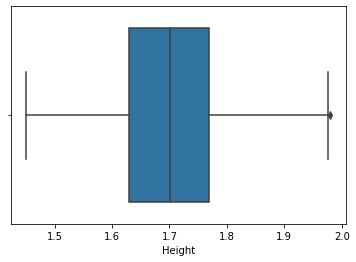

In [6]:
# Display the boxplot for Height to identify any outliers
sns.boxplot(df['Height'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Weight'>

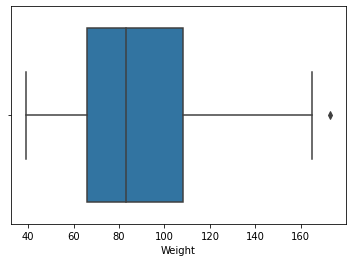

In [7]:
# Display the boxplot for Weight to identify any outliers
sns.boxplot(df['Weight'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

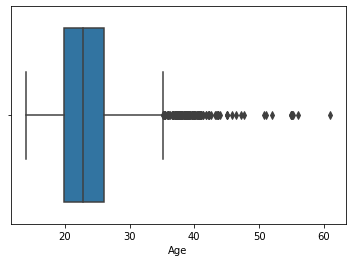

In [8]:
# Display the boxplot for Age to identify any outliers
sns.boxplot(df['Age'])

In [9]:
# Display the count of outliers for each attribute
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print(outliers)

Age                               167
CAEC                                0
CALC                                0
CH2O                                0
FAF                                 0
FAVC                                0
FCVC                                0
Gender                              0
Height                              1
MTRANS                              0
NCP                               577
NObeyesdad                          0
SCC                                 0
SMOKE                               0
TUE                                 0
Weight                              1
family_history_with_overweight      0
dtype: int64


/Users/azamrahman/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


We can see that NCP has a very high count of outliers. Since the attributes acts as an ordinal variable, we can keep it for now and remove the attribute if needed when developing the model. The most important attributes are Height and Weight for clustering, and we can see that it only has one outlier which shows that it does not need manipulation at the moment.

## 2. Deep Data Exploration and Preparation for Cluster Analysis

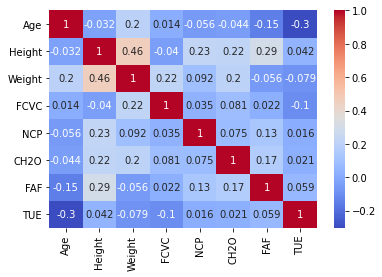

In [10]:
# plotting correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

# displaying heatmap
plt.show()

The correlation heatmap indicates that none of the variables have a siginificant correlation to each other that needs to be dealt with. Height and Weight have the strongest positive correlation of 46%. Since we know both variables are crucial in determining the Obesity Level, it will remain in the dataset.

In [11]:
# Create a copy of the original dataframe for data exploration 
df_explore = df.copy()
# Compute BMI using the original formula and Weight and Height columns
df_explore["BMI"] = df_explore["Weight"] / df_explore["Height"]**2
# Display first 5 rows
df_explore.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [12]:
# Apply logic to create another column named "Truth" to display if the BMI level falls into the correct category.

df_explore["Truth"] = np.where(((df_explore["BMI"] < 18.5) & (df_explore["NObeyesdad"] == "Insufficient_Weight")) | 
((df_explore["BMI"] >= 18.5) & (df_explore["BMI"] < 25) & (df_explore["NObeyesdad"] == "Normal_Weight")) | 
((df_explore["BMI"] >= 25) & (df_explore["BMI"] < 30) & ((df_explore["NObeyesdad"] == "Overweight_Level_I") | (df_explore["NObeyesdad"] == "Overweight_Level_II"))) |
((df_explore["BMI"] >= 30) & (df_explore["BMI"] < 35) & (df_explore["NObeyesdad"] == "Obesity_Type_I")) |
((df_explore["BMI"] >= 35) & (df_explore["BMI"] < 40) & (df_explore["NObeyesdad"] == "Obesity_Type_II")) |
((df_explore["BMI"] >= 40) & (df_explore["NObeyesdad"] == "Obesity_Type_III")) , True, False)
# Calculate the accuracy of BMI when compared to the class label.
Acc_of_BMI = (df_explore["Truth"].sum() / len(df_explore))*100
print("The Accuracy of BMI and Nobeyesdad is", Acc_of_BMI)


The Accuracy of BMI and Nobeyesdad is 95.11260182079539


This shows that BMI is not directly correlated to the Obesity level since not all levels are True. This means that some of the other columsn come intp the equation into determining the proper diagnosis for Obesity Level. The class label is not completely determined by the BMI (Height vs Weight) but have a very accurate representation.

<AxesSubplot:xlabel='NObeyesdad'>

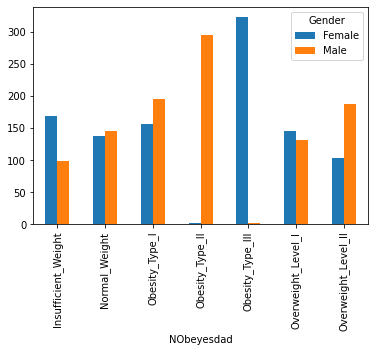

In [13]:
# Break the Data into Gender and Class label to make sure there is accurate representation
df.groupby(["NObeyesdad", "Gender"]).size().unstack(level=1).plot(kind='bar')

As we can see, most of the data is accurately represented for each gender except for Obesity_Type_I and II. Both categories lack severe representation of opposite genders. This could be an issue if other factors such as body fat percentage and muscle mass into play since it can distort the class label. On the other hand, we do have Height and Weight attributes that can contribute into lowering the errors of the other factors.

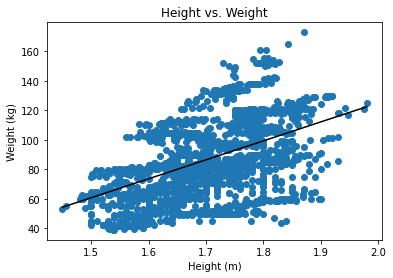

In [14]:
# Plot Weight vs. Height to prepare for clustering. Having a visual can show us if there is any cluster clearly depicted.
plt.scatter(df_explore["Height"], df_explore["Weight"])
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight")
# Add best line of fit
plt.plot(np.unique(df_explore["Height"]), np.poly1d(np.polyfit(df_explore["Height"], df_explore["Weight"], 1))(np.unique(df_explore["Height"])), color = 'black')

## 3. Completing the Cluster Analysis K = 7

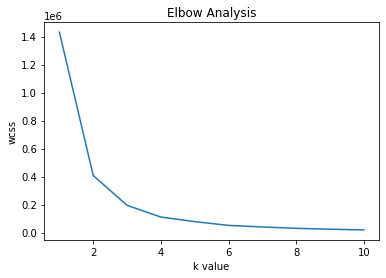

In [15]:
# How to check the right number of clusters for annual income vs spending score:
x = df.iloc[:,[2,3]].values
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("k value")
plt.ylabel("wcss")
plt.title("Elbow Analysis")
plt.show()

# Best number of clusters is 4 as the curve smoothens after 4. 
# Keep in mind that this is only for height vs weight

According to the elbow method, the best values of k is 4 clusters as the curve smoothens. However, we will still use 7 since we want to cluster based on each Obesity Level. On a more realistic note, having only 4 clusters that represent Underweight, Normal Weight, Overweight, and Obese would be the most effective way to develop the most accurate model based on clustering.

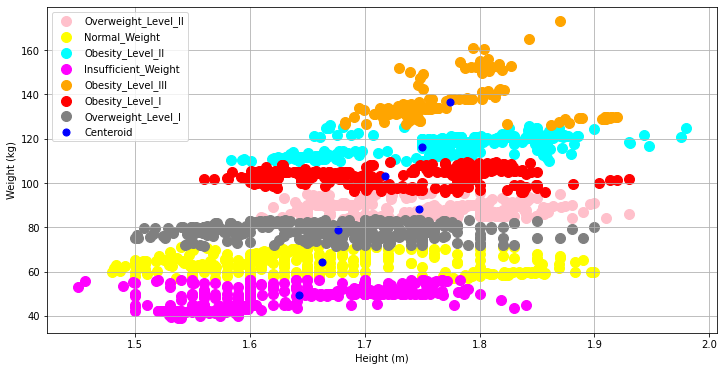

In [98]:
# Number of Clusters:
K = 7

km = KMeans(n_clusters = K, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
y_means = km.fit_predict(x)

# Select random observations as centroids
fig=plt.figure(figsize=(12,6))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Overweight_Level_II')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Normal_Weight')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Obesity_Level_II')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Insufficient_Weight')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Obesity_Level_III')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'red', label = 'Obesity_Level_I')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 100, c = 'grey', label = 'Overweight_Level_I')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid()
plt.show()

## 4. Comparing original Class Label and Clustering to measure Performance K = 7

In [100]:
# Export the clustered results to a columns
df['Cluster'] = pd.Series(y_means, index=df.index)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster,Truth
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,3,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,6,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,False


In [102]:
# Apply logic to create another column named "Truth" to display if the Cluster falls into the correct category.

df["Truth"] = np.where(((df["Cluster"] == 3) & (df["NObeyesdad"] == "Insufficient_Weight")) | 
((df["Cluster"] == 1) & (df["NObeyesdad"] == "Normal_Weight")) | 
((df["Cluster"] == 6) & (df["NObeyesdad"] == "Overweight_Level_I")) |
((df["Cluster"] == 0) & (df["NObeyesdad"] == "Overweight_Level_II")) |
((df["Cluster"] == 5) & (df["NObeyesdad"] == "Obesity_Type_I")) |
((df["Cluster"] == 2) & (df["NObeyesdad"] == "Obesity_Type_II")) |
((df["Cluster"] == 4) & (df["NObeyesdad"] == "Obesity_Type_III")) , True, False)
# Calculate the accuracy of Cluster when compared to the class label.
Acc_of_Cluster = (df["Truth"].sum() / len(df))*100
print("The Accuracy of Cluster when compared to original class label is", Acc_of_Cluster, "%")

The Accuracy of Cluster when compared to original class label is 50.407283181600384 %


When comparing the cluster to the original class label, we can see that the K-means cluster analysis did not do a good job predicting the level of obesity correctly using 7 clusters. This is perhaps the amount of clusters are too much, or the height and weight were not the best indicators to diagnose obesity. I will include a code that runs the K-means Algorithm with just 4 clusters to see if it can develop a more accurate class label. For example, the 4 clusters can be Underweight, Normal, Overweight, and Obese. Since the elbow method supported this method, it will be interesting to see how well it will do.

## 5. Completing the Cluster Analysis K = 4

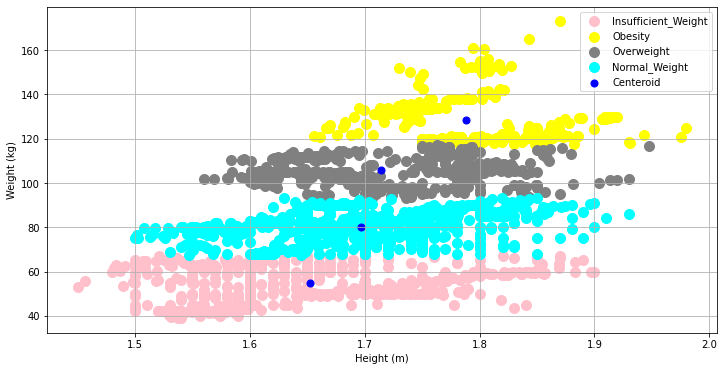

In [104]:
# Number of Clusters:
K = 4

km2 = KMeans(n_clusters = K, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
y_means2 = km2.fit_predict(x)

# Select random observations as centroids
fig=plt.figure(figsize=(12,6))
plt.scatter(x[y_means2 == 0, 0], x[y_means2 == 0, 1], s = 100, c = 'pink', label = 'Insufficient_Weight')
plt.scatter(x[y_means2 == 1, 0], x[y_means2 == 1, 1], s = 100, c = 'yellow', label = 'Obesity')
plt.scatter(x[y_means2 == 2, 0], x[y_means2 == 2, 1], s = 100, c = 'grey', label = 'Overweight')
plt.scatter(x[y_means2 == 3, 0], x[y_means2 == 3, 1], s = 100, c = 'cyan', label = 'Normal_Weight')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid()
plt.show()

## 6. Comparing original Class Label and Clustering to measure Performance K = 4

In [105]:
# Export the clustered results to a columns
df["Cluster"] = y_means2
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster,Truth
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0,True
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,3,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,3,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3,True


In [106]:
# Apply logic to create another column named "Truth" to display if the Cluster falls into the correct category.

df["Truth"] = np.where(((df["Cluster"] == 0) & (df["NObeyesdad"] == "Insufficient_Weight")) | 
((df["Cluster"] == 3) & (df["NObeyesdad"] == "Normal_Weight")) | 
((df["Cluster"] == 2) & (df["NObeyesdad"] == "Overweight_Level_I")) |
((df["Cluster"] == 2) & (df["NObeyesdad"] == "Overweight_Level_II")) |
((df["Cluster"] == 1) & (df["NObeyesdad"] == "Obesity_Type_I")) |
((df["Cluster"] == 1) & (df["NObeyesdad"] == "Obesity_Type_II")) |
((df["Cluster"] == 1) & (df["NObeyesdad"] == "Obesity_Type_III")) , True, False)
# Calculate the accuracy of Cluster when compared to the class label.
Acc_of_Cluster = (df["Truth"].sum() / len(df))*100
print("The Accuracy of Cluster when compared to original class label is", Acc_of_Cluster, "%")

The Accuracy of Cluster when compared to original class label is 32.82223287014854 %


With a cluster of 4, we do not see an increase in accuracy when comparing the class label to the derived class label using clustering. This is because it is not a fair apples-to-apples comparison since some of the data points are being meshed together to support 4 clustering. The reason for this analysis is to visually support the clustering, and to generalize the categories in case the levels of class is not needed.

## 7. Data Preparation for Supervised Learning

In [11]:
# Columns of all numerical variables:
num_cols = df._get_numeric_data().columns.tolist()

# Columns of all categorical variables:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('NObeyesdad')


In [13]:
# Creating a copy of the dataframe
df_onehot=df.copy()
# Converting  categorical variables to dummy variables to complete encoding
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
df_onehot = df_onehot.drop('Cluster',1)
df_onehot = df_onehot.drop('Truth',1)
df_onehot

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0


## 8. Model Building for Random Forest to predict Obesity Level

In [33]:
# Make sure that the class label is not included
class_col_name = 'NObeyesdad'

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]

# Split dataset into training set and test set: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109)

In [34]:
# Create Random Forest Model
clf = RandomForestClassifier(n_estimators=100)

# Train the model 
clf.fit(X_train, y_train)

# Create the Predictions
y_pred = clf.predict(X_test)

## 9. Performance Measures for Random Forest

In [35]:
# Show the classification Report to view the results
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.95      0.96        82
      Normal_Weight       0.76      0.89      0.82        70
     Obesity_Type_I       0.98      0.92      0.95       122
    Obesity_Type_II       0.96      0.96      0.96        84
   Obesity_Type_III       0.99      1.00      0.99        98
 Overweight_Level_I       0.96      0.86      0.91        95
Overweight_Level_II       0.88      0.95      0.91        76

           accuracy                           0.93       627
          macro avg       0.93      0.93      0.93       627
       weighted avg       0.94      0.93      0.93       627



In our initial Results, we can see that the Random Forest model can predict the obesity level at an accuracy of 95%. However, we can see through the precision of Normal_Weight shows that it does have some trouble predicting the true positives of the obesity level.

## 10. Check optimal number of n_estimators

Text(0, 0.5, 'Accuracy')

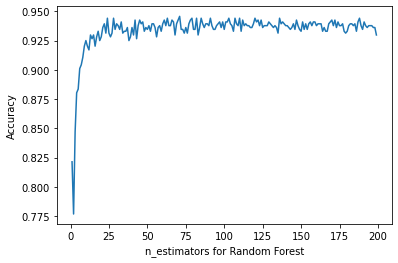

In [17]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    clf = RandomForestClassifier(n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


# plotting and testing accuracy

plt.plot(range(1, 200), scores)
plt.xlabel('n_estimators for Random Forest')
plt.ylabel('Accuracy')

As we can see, the curve starts to straighten out between 20-50 n_estimators. So adding more estimators can cause the training to be overfitting and slow down the code. Since the dataset is on the smaller end, it won't make a big difference to the speed, but nice to do in good practice. A 95% accuracy is already very good for the model. We just need to make sure it is not being overtrained.

## 11. Tuned Random Forest Model and Performance Measures

In [31]:
# Create Random Forest Model
clf2 = RandomForestClassifier(n_estimators=50)

# Train the model 
clf2.fit(X_train, y_train)

# Create the Predictions
y_pred = clf2.predict(X_test)

In [32]:
# Show the classification Report to view the results
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        82
      Normal_Weight       0.76      0.93      0.84        70
     Obesity_Type_I       0.99      0.94      0.97       122
    Obesity_Type_II       1.00      0.98      0.99        84
   Obesity_Type_III       0.99      1.00      0.99        98
 Overweight_Level_I       0.96      0.86      0.91        95
Overweight_Level_II       0.90      0.95      0.92        76

           accuracy                           0.94       627
          macro avg       0.94      0.94      0.94       627
       weighted avg       0.95      0.94      0.95       627



In the final results, we can see that the tuned model performed slightly better after tuning the n_parameters. Since the model is already very high in accuracy, there is not much tuning needed to be done since the model is acceptable. Additionally the model was created in a very short amount of time allowing it to be built very quickly and used.